In [54]:
import re
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [55]:
X, y = df.drop("label", axis=1), df.label
X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=5)

X_train = X_train / 255
X_test = X_test / 255

X_train = np.array([X_train]).reshape(-1, 28, 28, 1)
X_test = np.array([X_test]).reshape(-1, 28, 28, 1)

X_train.shape

(39900, 28, 28, 1)

In [56]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.reshape(len(X_train), 28 * 28)
X_test = X_test.reshape(len(X_test), 28 * 28)
X_train = np.array([X_train]).reshape(-1, 28, 28, 1)
X_test = np.array([X_test]).reshape(-1, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [57]:
cnn = keras.Sequential([
    # cnn layer
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    # keras.layers.Conv2D(filters=4, kernel_size=(3, 3), activation="relu"),
    # keras.layers.BatchNormalization(),
    # keras.layers.MaxPooling2D((2, 2)),


    # dense layer
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [58]:
cnn.fit(X_train, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1643 - accuracy: 0.9501
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0552 - accuracy: 0.9830
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0407 - accuracy: 0.9873
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0333 - accuracy: 0.9893
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0276 - accuracy: 0.9908
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0222 - accuracy: 0.9927
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0194 - accuracy: 0.9935
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0158 - accuracy: 0.9948
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0151 - accuracy: 0.9951
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.011

In [59]:
y_pred = cnn.predict(X_test)
y_pred = [np.argmax(x) for x in y_pred]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [62]:
X_test_final = np.array([df_test]).reshape(-1, 28, 28, 1)

y_pred_final = cnn.predict(X_test_final)
y_pred_final = [np.argmax(x) for x in y_pred_final]


df_result = pd.DataFrame({"ImageId": range(1, 28001), "Label": y_pred_final})
df_result.to_csv("result.csv", index=False)

## Great Model

In [76]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

cnn_new = keras.Sequential([
    # preprocessing
    preprocessing.RandomContrast(0.2),
    preprocessing.RandomTranslation(height_factor=0.1,width_factor=0.1),

    # cnn
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.BatchNormalization(axis=1),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.BatchNormalization(axis=1),
    layers.Conv2D(filters=128, kernel_size=5, activation='relu'),
    layers.BatchNormalization(axis=1),
    layers.Conv2D(filters=128, kernel_size=5, activation='relu'),
    layers.MaxPool2D(),
    layers.BatchNormalization(axis=1),

    # output
    layers.Flatten(),
    layers.Dense(units=1024,activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

cnn_new.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [81]:
cnn_new.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0223 - accuracy: 0.9932
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0198 - accuracy: 0.9941
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0190 - accuracy: 0.9943
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0170 - accuracy: 0.9949
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0169 - accuracy: 0.9947
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0149 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0147 - accuracy: 0.9955
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0151 - accuracy: 0.9953
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0136 - accuracy: 0.9962
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.012

In [82]:
y_pred = cnn_new.predict(X_test)
y_pred = [np.argmax(x) for x in y_pred]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      1.00      1032
           3       0.99      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      1.00      1028
           8       0.99      1.00      1.00       974
           9       0.99      1.00      0.99      1009

    accuracy                           0.99     10000
   macro avg       1.00      0.99      0.99     10000
weighted avg       1.00      0.99      0.99     10000



In [83]:
X_test_final = np.array([df_test]).reshape(-1, 28, 28, 1)

y_pred_final = cnn_new.predict(X_test_final)
y_pred_final = [np.argmax(x) for x in y_pred_final]


df_result = pd.DataFrame({"ImageId": range(1, 28001), "Label": y_pred_final})
df_result.to_csv("result_1.csv", index=False)

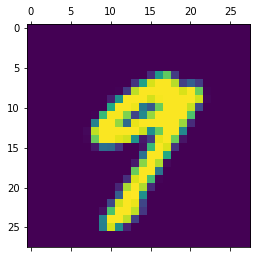

In [84]:
plt.matshow(X_test[20])